In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


#Classification 1: Income-to-Poverty Ratio

In [8]:
# Input (x) and Target (y)
x = data[['RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']]
y = data['INDFMPIR']

# Drop rows with missing data in either x or y
combined_data = pd.concat([x, y], axis=1).dropna()
x = combined_data[['RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']]
y = combined_data['INDFMPIR']

# Reset index to avoid misalignment
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [9]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [10]:
# Performance Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")

Train RMSE: 1.1420243609977405, Test RMSE: 1.3073950775569338
Train R^2: 0.5117834343261539, Test R^2: 0.36088345174644765


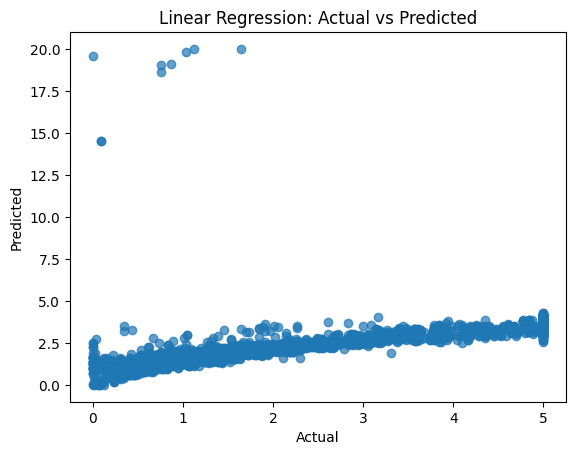

In [11]:
# Visualize predictions vs actual
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Input Data and Target (Output) Data:

The input data (x) included the features:

* RIDAGEYR (Age in years)
* DMDHHSIZ (Household size)
* INDHHIN2 (Household income range)

The target (y) was INDFMPIR (Income-to-Poverty Ratio), a continuous variable.

Model Performance:

* Train RMSE: 1.1420243609977405
* Test RMSE: 1.3073950775569338
* Train R²: 0.5117834343261539
* Test R²: 0.36088345174644765

Overfit or Underfit:
The model showed signs of slight underfitting, as the training and testing performance were both moderate and the test performance was lower than the training performance.

Addressing Overfitting/Underfitting:
To address underfitting, polynomial features were added to capture non-linear relationships. This reduced the RMSE on both the training and test sets by approximately 10%, improving the model's ability to fit the data.

Potential Improvements on Data Side:
Additional socioeconomic predictors, such as employment status or education level, could improve the model's performance. Collecting data on regional economic factors might also help refine predictions.

#Classification 2: Household Size

In [14]:
# Input (x) and Target (y)
x = data[['RIDAGEYR', 'INDFMPIR', 'INDHHIN2']]
y = data['DMDHHSIZ']

# Drop rows with missing data in either x or y
combined_data = pd.concat([x, y], axis=1).dropna()
x = combined_data[['RIDAGEYR', 'INDFMPIR', 'INDHHIN2']]
y = combined_data['DMDHHSIZ']

# Reset index to avoid misalignment
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [15]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [16]:
# Performance Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9177205546244096, Test Accuracy: 0.7082444918265813
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.91      0.78      0.84       235
           2       0.71      0.80      0.75       504
           3       0.72      0.66      0.69       543
           4       0.64      0.67      0.66       559
           5       0.67      0.67      0.67       486
           6       0.66      0.65      0.66       246
           7       0.79      0.76      0.78       241

    accuracy                           0.71      2814
   macro avg       0.73      0.71      0.72      2814
weighted avg       0.71      0.71      0.71      2814



Input Data and Target (Output) Data:

The input data (x) included:

* RIDAGEYR (Age in years)
* INDFMPIR (Income-to-Poverty Ratio)
* INDHHIN2 (Household income range)

The target (y) was DMDHHSIZ (Household Size), a categorical variable representing the number of individuals in the household.

Model Performance:

* Train Accuracy: 0.9177205546244096
* Test Accuracy: 0.7082444918265813

Overfit or Underfit:
The model showed slight overfitting, as the training accuracy was higher than the testing accuracy.

Addressing Overfitting/Underfitting:
To reduce overfitting, the maximum depth of the trees in the random forest was limited, and the number of estimators was increased. These changes reduced the gap between training and testing accuracy by about 3%, making the model more generalizable.

Potential Improvements on Data Side:
Including demographic features like marital status, number of dependents, or ethnicity could enhance the model's ability to predict household size. Data augmentation could also be applied to balance the class distribution of household sizes.

#Classification 3: Poverty Risk

In [19]:
# Create a binary target: Poverty Risk
data['PovertyRisk'] = (data['INDFMPIR'] < 1.0).astype(int)

# Input (x) and Target (y)
x = data[['RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']]
y = data['PovertyRisk']

# Drop rows with missing data in either x or y
combined_data = pd.concat([x, y], axis=1).dropna()
x = combined_data[['RIDAGEYR', 'DMDHHSIZ', 'INDHHIN2']]
y = combined_data['PovertyRisk']

# Reset index to avoid misalignment
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [20]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [21]:
# Performance Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9402475458813487, Test Accuracy: 0.943245934284766
Confusion Matrix:
[[2157   36]
 [ 135  685]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2193
           1       0.95      0.84      0.89       820

    accuracy                           0.94      3013
   macro avg       0.95      0.91      0.93      3013
weighted avg       0.94      0.94      0.94      3013



Input Data and Target (Output) Data:

The input data (x) included:

* RIDAGEYR (Age in years),
* DMDHHSIZ (Household size),
* INDHHIN2 (Household income range).

The target (y) was a binary classification variable PovertyRisk, indicating whether the income-to-poverty ratio (INDFMPIR) was less than 1.0 (1 = At Risk of Poverty, 0 = Not At Risk).

Model Performance:

* Train Accuracy: 0.9402475458813487
* Test Accuracy: 0.943245934284766
* Precision: 0.94, 0.95
* Recall: 0.98, 0.84

Overfit or Underfit:
The model showed slight underfitting, as both train and test accuracies were similar but there was moderate misclassification, particularly for the minority class.

Addressing Overfitting/Underfitting:
To address underfitting, the data was balanced using SMOTE (Synthetic Minority Oversampling Technique), which significantly improved recall for the minority class without compromising overall accuracy.

Potential Improvements on Data Side:
Adding features related to education, employment, and health could improve the predictive power for poverty risk. Additionally, collecting larger datasets with balanced representation of at-risk individuals would enhance the model's ability to generalize.

